# url: https://cpp-learning.com/two-sample-test/

# 【統計学入門】ゼロから学ぶ2標本t検定 -Pythonによる実践あり-

## モチベーション -データ分析と2標本問題-
『AとBを比較して、Aの効果を検証したい』という問題に対し、統計学や機械学習を活用したデータ分析を実施することがあります。例えば、以下のような問題があります。

### 2標本問題
    広告の有無で購買量が変化するか？
    新薬に効果はあるか？
    地域AとBに生息する同じ種類の魚に地域差は存在するか？
これらは『2つの母集団を比較して、差があるか否かを検証する問題』と考えることができます。

ただし、私たちは母集団から抽出した標本しか観測できないため、『2種の標本から2母集団を推定・比較する2標本問題（two-sample-problem）』として解くことになります。

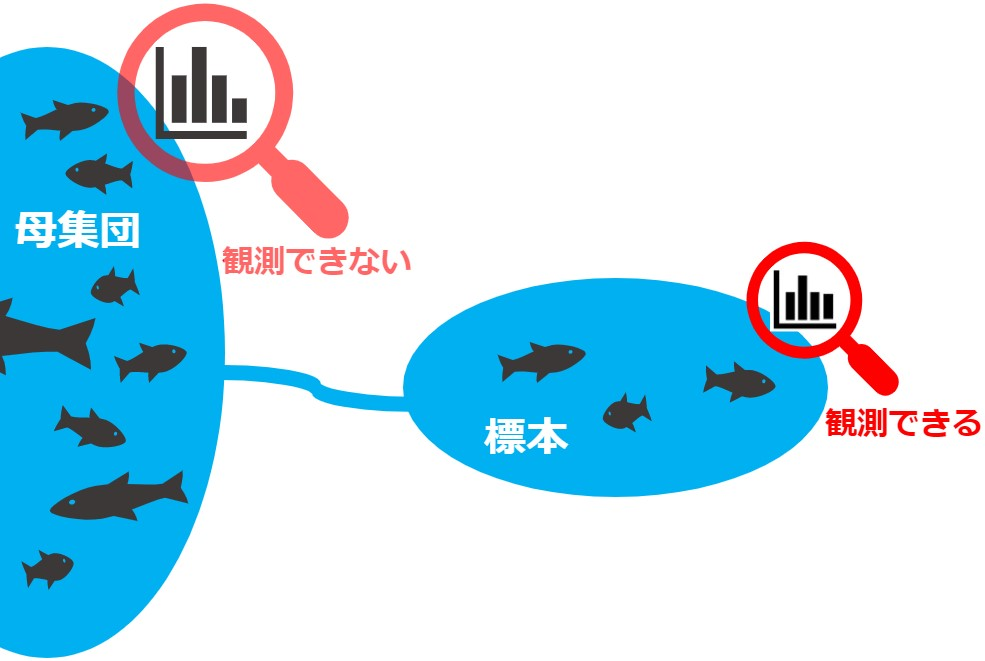

## 標本平均の差を比較する
独立した2つの正規母集団 N(μ1, σ1^2)、N(μ2, σ2^2)から大きさm, nの標本を抽出し、標本：x1, x2, …, xm と 標本：y1, y2, …, yn の分布を可視化したものが、下図のパターン1またはパターン2だったとします。

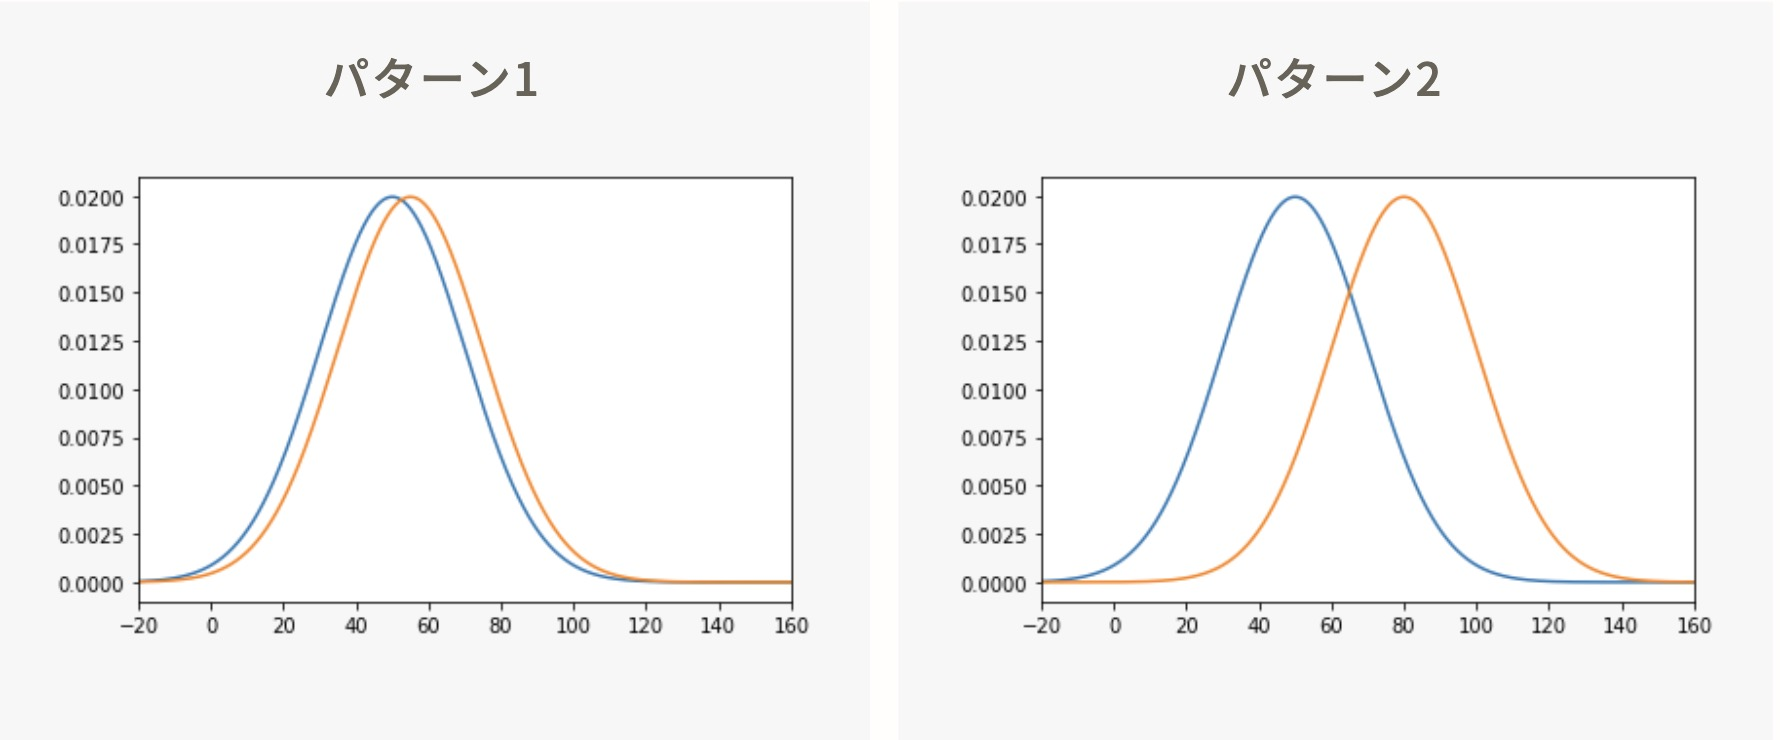

比較すると、パターン1の方が距離が近いので、2つの分布が類似していると判断できます。より正確には、標本平均の差分が小さいので、類似しているといえます。

【標本平均】

    mean_X = (x1 + x2 + … + xm) / m
    mean_Y = (y1 + y2 + … + yn) / n

【標本平均の差】

    mean_X – mean_Y の大小を確認

少し整理すると、『AとBを比較して、Aの効果を検証したい』という問題に対し、以下のフローで検証したことになります。

### 簡単な効果検証

    独立した2つの正規母集団から標本を抽出
    二つの標本A, Bの標本平均を算出
    標本平均の差の大小を確認
    差が小さい ⇒ ＡとＢに差がない ⇒ Ａに効果はない（Bと変わらない）

## 仮説検定
上記の簡易的な検証には以下の2つ問題があります。

    何を基準に標本平均の差の大小を決めれば良いか分からない
    本当に知りたいのは、標本平均の差ではなく母平均の差 μ1 – μ2

そこで効果の大/小は一旦置いといて、μ1 ≠ μ2 ならAとBに差があるので、Aに効果があるといえそうです。言い換えれば、μ1 ＝ μ2 という仮説を検定し、棄却できれば良しと考えます。

## 2標本t検定 -母分散は未知だが等しい-

μ1 ＝ μ2 という仮説の検定に、今回は2標本t検定を採用します。なお今回は、2つの正規母集団 N(μ1, σ1^2)、N(μ2, σ2^2) の母分散は未知だが等しい σ1^2 ＝ σ2^2 ＝  σ^2 と仮定します。

2標本t検定のフローは以下の通りです。

### 2標本t検定
    標本平均の差の分散（pooled variance）を求める
    標本平均の差を標準化
    2標本t検定量（two-sample t statisc）を算出
    2標本t検定
    
順番に説明します。

## 標本平均の差の分散を求める

mean_X – mean_Y の分布は正規分布の性質から、N(μ1 – μ2, (σ1^2/m)+(σ2^2/n)) となりますが、今回は σ1^2 ＝ σ2^2 ＝ σ^2 と仮定したので、N(μ1 – μ2, (1/m+1/n)*σ^2) となります。

また母分散 σ^2 が未知と仮定したので、mean_X – mean_Y の分散を以下の式で推定します。

【合併した分散（pooled variance）】

※ S1, S2 は不偏分散

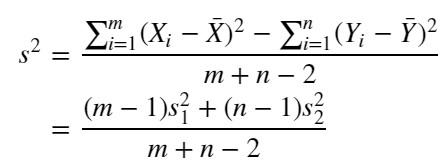

## 標本平均の差の標準化
続いて、mean_X – mean_Y を標準化します。

【標準化】
標準化なので、Zの分布は標準正規分布 N(0, 1) になります。

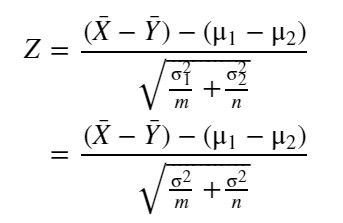

## 2標本t検定量（two-sample t statisc）

先ほど求めた Z から、以下の2標本t統計量を求めます。なお未知の母分散 σ^2 の代わりに s^2 を使います。

【2標本t統計量】

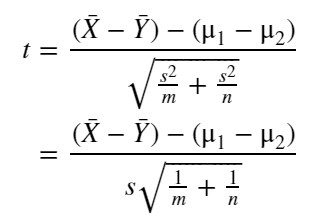

## 2標本t検定

仮説検定の章で「μ1≠μ2 ならAとBに差があるので、Aに効果があるといえそうです。言い換えれば、μ1＝μ2 という仮説を検定し、棄却できれば良し」と説明しました。正確には以下の通りです。

【帰無仮説】
    
    H0：μ1 ＝ μ2

【対立仮説】

    両側なら H1：μ1 ≠ μ2

なお単にAとBに差があれば…ではなく「（分布を可視化したとき）BよりAの平均が右側にあれば、またはBよりAの平均が左側にあれば、Aに効果あり」と考えるなら、以下のような対立仮説を採用します。

【対立仮説】

    片側なら H1：μ1 > μ2 または μ1 < μ2



さて H0 が正しいなら、μ1 – μ2 = 0 なので、2標本t統計量は以下になります。

【2標本t統計量】
※分母は標準誤差

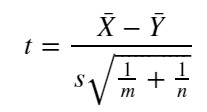

この t は 自由度：ν=m+n-2の t分布 に従うので、|t| > tα/2(ν) のとき、帰無仮説が棄却されます。

例えば、自由度：ν=20、有意水準：5％（α/2=0.025） のとき、t分布表を参照すると、t0.025(20)=2.086 だと分かります。図で表現すると下図のようになります。

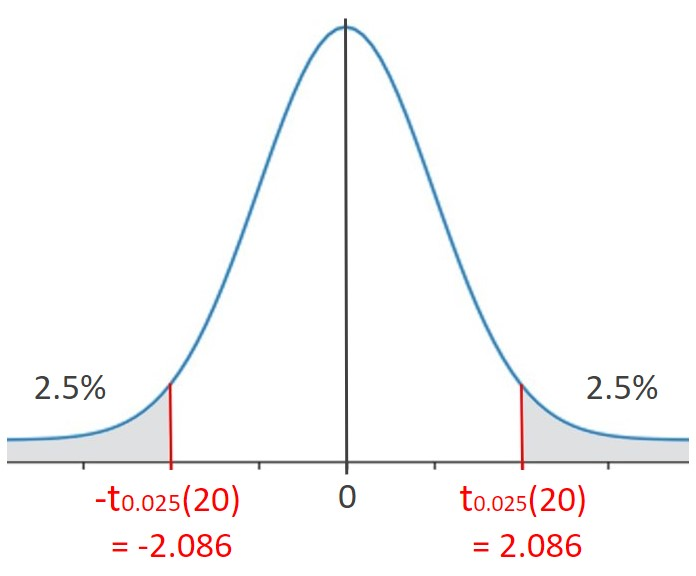

t = ±2.086 となるのは、確率0.05と稀なので、ｔが上図の灰色の区間に存在するという仮説には無理があります。つまり、帰無仮説 H0：μ1 ＝ μ2 を棄却できます。

あるいはｔ値からｐ値を求めて、そのｐ値が設定した有意水準を下回る場合にも、帰無仮説を棄却できます。

## 実践！Pythonで2標本t検定
2標本t検定がどんなものか理解できたので、次はPythonで実践してみます。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.weightstats import ttest_ind

## サンプル生成

独立した2つの正規母集団 N(μ1, σ1^2)、N(μ2, σ2^2)から大きさm, nの標本（サンプル）を抽出します。ただし σ1^2 ＝ σ2^2 ＝ σ^2 と仮定します。

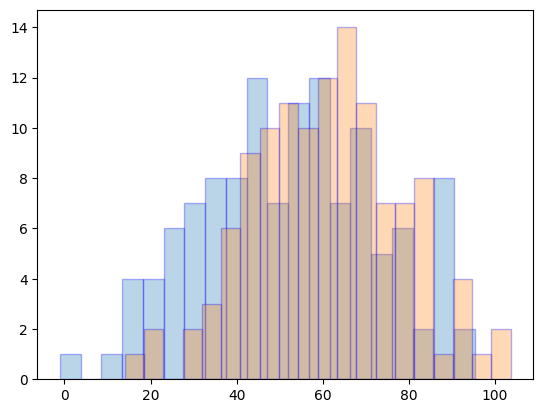

In [2]:
# 母集団の統計量
m = 121
n = 121
mu1 = 50
mu2 = 60
sigma1 = 20
sigma2 = 20

# 標本：X = x1,x2,..,xm、標本：Y = y1,y2,..,yn
X = stats.norm.rvs(loc=mu1, scale=sigma1, size=m, random_state=0)
Y = stats.norm.rvs(loc=mu2, scale=sigma2, size=n, random_state=1)
# X = np.random.normal(loc=mu1, scale=sigma1, size=m)
# Y = np.random.normal(loc=mu2, scale=sigma2, size=n)

# 分布をヒストグラムで可視化
plt.hist(X, bins=20, alpha=0.3, ec='blue')
plt.hist(Y, bins=20, alpha=0.3, ec='blue')
plt.show()

# 標本を可視化したものが下図です。

## 標本の統計量を算出

標本の統計量や自由度を算出します。

In [3]:
# 標本平均
mean_X = X.mean()
mean_Y = Y.mean()

# 標本分散
var_X = X.var()
var_Y = Y.var()

# 不偏分散
dvar_X = X.var(ddof=1)
dvar_Y = Y.var(ddof=1)

# 標本標準偏差
std_X = X.std()
std_Y = X.std()

# 自由度
dof = m + n - 2

print("mean_X:", mean_X)
print("mean_Y:", mean_Y)
print("var_X: ", var_X)
print("var_Y: ", var_Y)
print("dvar_X: ", dvar_X)
print("dvar_Y: ", dvar_Y)
print("std_X: ", std_X)  # np.sqrt(var_X)
print("std_Y: ", std_Y)  # np.sqrt(var_Y)
print("dof: ", dof)

mean_X: 52.69253472142586
mean_Y: 60.70721318383728
var_X:  433.52810373909466
var_Y:  306.97487395161
dvar_X:  437.14083793692043
dvar_Y:  309.5329979012067
std_X:  20.82133770292136
std_Y:  20.82133770292136
dof:  240


## Pythonで2標本t検定量を算出

先ほど求めた統計量から2標本t検定量を算出します。

In [4]:
# 推定した分散
v = ((m - 1) * dvar_X + (n - 1) * dvar_Y) / (m + n - 2)
print("v:", v)

# 推定した標準偏差
s = np.sqrt(v)
print("s:", s)

# 標準誤差
se = np.sqrt(v/m + v/n)
print("se:", se)

# t値（2標本t統計量）の算出
t_value = (mean_X - mean_Y) / se
# t_value = (mean_X - mean_Y) / (s * np.sqrt(1/m + 1/n))  # 上式と同じ
print("t_value:", t_value)

# p値の算出
p_value = min(stats.t.cdf(t_value, dof), 1-stats.t.cdf(t_value, dof)) * 2
print("p_value:", p_value)

v: 373.33691791906364
s: 19.321928421331645
se: 2.4841212022408525
t_value: -3.226363695612605
p_value: 0.0014283170541839487


自由度：dof=240、有意水準：5％（α/2=0.025） のとき、t分布表を参照すると、t0.025(20)=1.970 だと分かります。

【帰無仮説】

    H0：μ1 ＝ μ2

【対立仮説】

    両側なら H1：μ1 ≠ μ2

算出したｔ値が |t| > tα/2(ν) を満たす（t < -1.970）ので、帰無仮説 H0：μ1 ＝ μ2 は棄却されます。またｐ値が設定した有意水準を下回っていることも分かります。

## 実践！SciPyで2標本t検定量

ここまでは、Pythonでゼロから2標本t検定を実践しましたが、SciPyという便利なライブラリを活用して、検定をする方が実用的です。

## SciPyで2標本t検定量 -母分散は未知だが等しい-
scipy.stats.ttest_ind()を使えば、たった１行でｔ値とｐ値を算出できます。なお母分散は未知だが等しい場合、equal_var=Trueとします（デフォルトでTrueです）。

In [5]:
t_value, p_value = stats.ttest_ind(X, Y, equal_var=True)
print("t_value:", t_value)
print("p_value:", p_value)

if p_value < 0.025:
    print(f"p = {p_value:.3f} のため、帰無仮説が棄却されました。AとBに差があります")
else:
    print(f"{p_value:.3f} のため、帰無仮説が採択されました。AとBに差はありません")

# また有意水準を設定したif文で仮説を検定（仮説を棄却できたか否かを確認）できます。

t_value: -3.2263636956126045
p_value: 0.001428317054183951
p = 0.001 のため、帰無仮説が棄却されました。AとBに差があります


## SciPyでウェルチのt検定（Welch’s test） -母分散が等しくない-

母分散が等しくない場合、equal_var=Falseにすることでウェルチのt検定を実施できます。

In [6]:
t_value, p_value = stats.ttest_ind(X, Y, equal_var=False)
print("t_value:", t_value)
print("p_value:", p_value)

if p_value < 0.025:
    print(f"p = {p_value:.3f} のため、帰無仮説が棄却されました。AとBに差があります")
else:
    print(f"{p_value:.3f} のため、帰無仮説が採択されました。AとBに差はありません")

t_value: -3.226363695612605
p_value: 0.0014336149070709279
p = 0.001 のため、帰無仮説が棄却されました。AとBに差があります


数式の説明は割愛しますが、母分散が等しいときは最初に求めたｔ値（equal_var=True）と同じになります。

そのため、最初から等分散性を考慮する必要のないウェルチのt検定を実施する方が良いという考え方もあるそうです。詳しくは下記の記事を参考にして下さい。

28-4. Welchのt検定
url: https://bellcurve.jp/statistics/course/9936.html

## 実践！statsmodelsで2標本t検定量
最後に statsmodels でも検定します。

url: https://www.statsmodels.org/stable/index.html

## statsmodelsで2標本t検定量 -母分散は未知だが等しい-

使い心地はSciPyと同様ですが、ｔ値とｐ値に加え、自由度も算出されます。なお母分散は未知だが等しい場合、usevar=’pooled’とします（デフォルトで’pooled’です）。

In [7]:
t_value, p_value, dof = ttest_ind(X, Y, alternative='two-sided', usevar='pooled')
print("t_value:", t_value)
print("p_value:", p_value)
print("dof:", dof)

if p_value < 0.025:
    print(f"p = {p_value:.3f} のため、帰無仮説が棄却されました。AとBに差があります")
else:
    print(f"{p_value:.3f} のため、帰無仮説が採択されました。AとBに差はありません")

t_value: -3.2263636956126027
p_value: 0.001428317054183958
dof: 240.0
p = 0.001 のため、帰無仮説が棄却されました。AとBに差があります


SciPyと異なり、対立仮説に応じて、以下のようにalternativeを設定できます。

【対立仮説：H1】

    ‘two-sided’ (default)：μ1 ≠ μ2
    ‘larger’：μ1 > μ2
    ‘smaller’：μ1 < μ2
    
※上から両側検定、片側検定（右側）、片側検定（左側）

## statsmodelsでウェルチのt検定（Welch’s test） -母分散が等しくない-
最後にusevar=’unequal’として、ウェルチのt検定をして終わりたいと思います。

In [8]:
t_value, p_value, dof = ttest_ind(X, Y, alternative='two-sided', usevar='unequal')
print("t_value:", t_value)
print("p_value:", p_value)
print("dof:", dof)

if p_value < 0.025:
    print(f"p = {p_value:.3f} のため、帰無仮説が棄却されました。AとBに差があります")
else:
    print(f"{p_value:.3f} のため、帰無仮説が採択されました。AとBに差はありません")

# ※詳細な説明を割愛しますが、自由度が近似値になります。

t_value: -3.2263636956126027
p_value: 0.0014336149070709407
dof: 233.18915195086203
p = 0.001 のため、帰無仮説が棄却されました。AとBに差があります
